In [1]:
import pandas as pd
from datetime import datetime
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from NowcastingEco import NowcastingEco
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Cleaning and tone analysis

In [2]:
# Local path for the headlines data
df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')

/var/folders/4q/7w99lfvx0cl74dtmhv3y6gfc0000gn/T/ipykernel_73606/1879980346.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')


In [3]:
crash_test = NowcastingEco(df)
cleaned_df, filtered_df = crash_test.clean_data() # Egypt/UAE

/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.date = self.df.date.apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d%H%M%S'))
/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.tone = self.df.tone.apply(lambda x: self.convert_into_list(x))
/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy

ERROR Invalid input


/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mean_tone'] = df2.tone.apply(lambda x: x[0])
/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['binary_tone'] = df2.tone.apply(lambda x: 1 if x[1] > x[2] else 0)


date
2015-02-28   -0.385964
2015-03-31    0.433215
2015-04-30   -0.236517
2015-05-31    0.148930
2015-06-30    0.197200
                ...   
2022-07-31    0.431134
2022-08-31    0.427051
2022-09-30    0.702446
2022-10-31    0.785207
2022-11-30   -0.378585
Freq: M, Name: mean_tone, Length: 94, dtype: float64
Date
2015-02-28   -622.00
2015-03-31   -572.00
2015-04-30   -507.00
2015-05-31   -451.00
2015-06-30   -663.00
               ...  
2022-07-31     66.53
2022-08-31   -273.69
2022-09-30    425.71
2022-10-31   -400.07
2022-11-30   -837.86
Name: Value, Length: 94, dtype: float64
The correlation between the average tones and the Exports from 2015 to 2022-11-30 00:00:00 is: 0.282704956899317.
The correlation between the average tones and the Exports from 2015 to 2022-11-30 00:00:00 is: 0.28697363453410824.


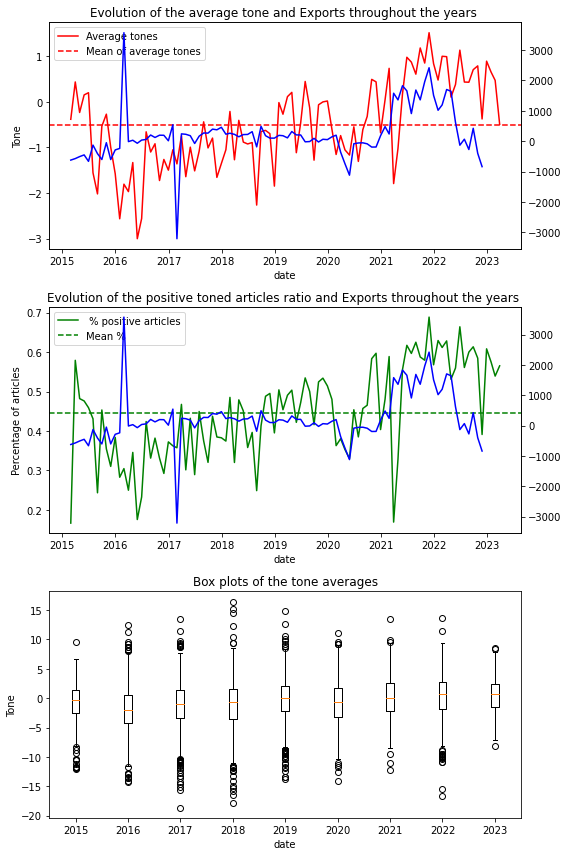

Number of articles per year for the filtered country and theme:  date
2015-02-28      6
2015-03-31    259
2015-04-30     56
2015-05-31     42
2015-06-30     98
             ... 
2022-11-30    386
2022-12-31     97
2023-01-31    127
2023-02-28    102
2023-03-31     23
Freq: M, Name: cleaned_themes, Length: 98, dtype: int64


In [4]:
crash_test.tone_analysis(path='/Users/amaury/Documents/!DSBA/CRP/Differentiated data.xlsx',indicator=True) 

### More advanced modelling with linear regression

Since direct correlations was hard to establish between tone and indicators, we are trying to model indicators with multiples tone time series as inputs through Linear regression (allows to keep explainability and interpretability for the client).

In [7]:
# More convenient to reload data with the new tone (obtained with NLP_models.ipynb)
df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/egypt_tone_pred_v2.csv')

crash_test = NowcastingEco(df)

In [8]:
tone, ind = crash_test.compute_tone_time_series(df,'/Users/amaury/Documents/!DSBA/CRP/Differentiated data.xlsx')

/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['binary_tone'] = df3.tone_prediction.apply(lambda x: 1 if x == "positive" else 0)
/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['binary_tone'] = df3.tone_prediction.apply(lambda x: 1 if x == "positive" else 0)
/Users/amaury/Desktop/CRP_Egyptian_Economy/NowcastingEco.py:370: SettingWithCopyWarning: 
A value is trying to be set 

In [9]:
# Checking stationarity
# ADF Test to assess the stationarity of the indicator time series
adf_stat, p_value, _, _, _, _ = adfuller(ind.Value)
print("ADF Statistic:", adf_stat)
print("p-value:", p_value)
print("Is the time series stationary (ADF)?", p_value < 0.05)

ADF Statistic: -3.8910351388581867
p-value: 0.002101823154075481
Is the time series stationary (ADF)? True


In [11]:
## Linear Regression

# Concatenate the selected tone series into a single DataFrame
concatenated_series = pd.concat([tone[0],tone[1],tone[11]], axis=1)
# Merge the GDP indicator DataFrame with the concatenated series DataFrame
merged_data = pd.merge(ind, concatenated_series, left_on='Date',right_on='date')  # or 'year'
# to check if each filtered tone time series doesn't contain null values
print(merged_data.isnull().sum())
print(merged_data)


Value          0
year_month     0
year           0
binary_tone    0
binary_tone    0
binary_tone    0
dtype: int64
     Value year_month  year  binary_tone  binary_tone  binary_tone
0   1733.9    2015-03  2015     0.796078     0.482090     0.511013
1   -126.0    2015-06  2015     0.801980     0.304348     0.392315
2   -470.8    2015-09  2015     0.704467     0.359071     0.408149
3    735.4    2015-12  2015     0.611111     0.362121     0.385654
4   -983.5    2016-03  2016     0.602353     0.404908     0.435612
5    334.2    2016-06  2016     0.543703     0.461104     0.389384
6    526.3    2016-09  2016     0.679573     0.484656     0.500566
7    787.6    2016-12  2016     0.610994     0.426396     0.468271
8   -151.8    2017-03  2017     0.695822     0.481186     0.552989
9   -324.7    2017-06  2017     0.624396     0.408765     0.421196
10  -337.8    2017-09  2017     0.703827     0.424242     0.491166
11  -500.1    2017-12  2017     0.721826     0.376246     0.549738
12   320.1    

Mean Squared Error: 892844.0064687371
R-squared Score: 0.6476778252487289


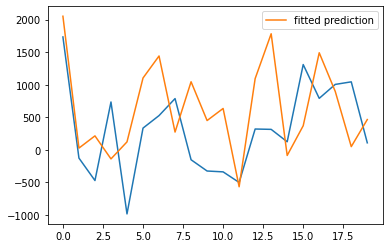

/var/folders/4q/7w99lfvx0cl74dtmhv3y6gfc0000gn/T/ipykernel_73606/1978187927.py:54: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_data.year_month_str = [str(ym) for ym in test_data.year_month]


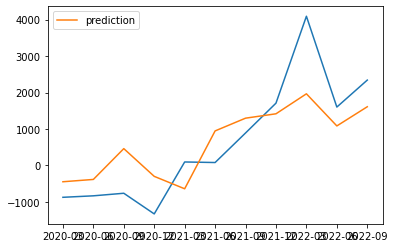

0.8571383664035951
0.8181818181818182


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Split the data based on time
train_data = merged_data[(merged_data['year'] >= 2015) & (merged_data['year'] <= 2019)]
test_data = merged_data[(merged_data['year'] >= 2020) & (merged_data['year'] <= 2022)]

X_train = train_data.iloc[:, 3:].values
y_train = train_data['Value'].values.reshape(-1, 1)
X_test = test_data.iloc[:, 3:].values
y_test = test_data['Value'].values.reshape(-1, 1)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the input features
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the scaled testing data
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to obtain the original scale
predictions = scaler.inverse_transform(predictions_scaled)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)

# Plotting predictions on the training data
train_predictions_scaled = model.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)

plt.plot(y_train)
plt.plot(train_predictions,label='fitted prediction')
plt.legend()
plt.show()

test_data.year_month_str = [str(ym) for ym in test_data.year_month]


plt.plot(test_data.year_month_str,y_test)
plt.plot(test_data.year_month_str,predictions,label='prediction')
plt.legend()
plt.show()

corr,_ = pearsonr(y_test.ravel(),predictions.ravel())
print(corr)

directional_accuracy = ((pd.Series(y_test.flatten()).diff() > 0) == (pd.Series(predictions.flatten()).diff() > 0)).mean()
print(directional_accuracy)
#print(pd.Series(y_test.flatten()))
#print(pd.Series(predictions_scaled.flatten()))

Mean Squared Error (Lasso): 892844.0064687371
R-squared Score (Lasso): 0.6476778252487289


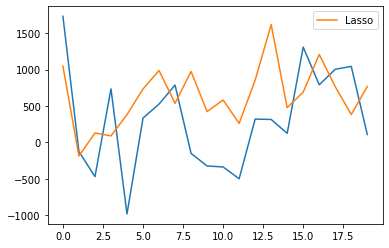

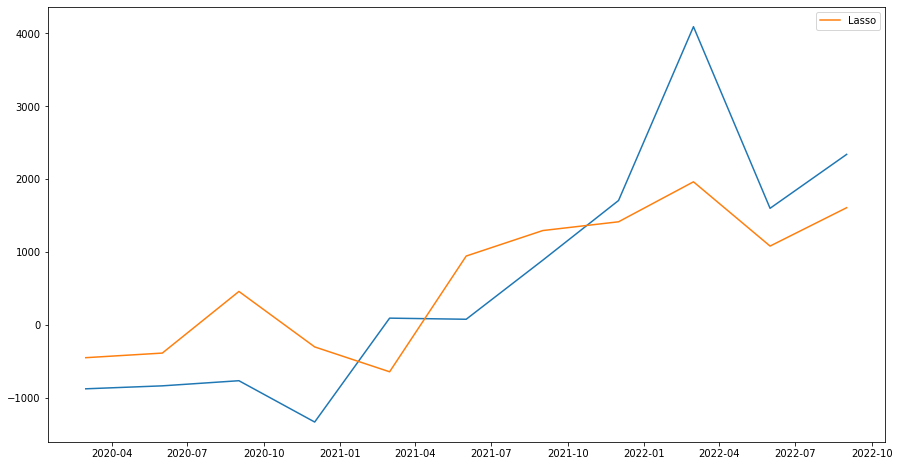

Pearson's Correlation (Lasso): 0.8571383664035951
Directional Accuracy (Lasso): 0.8181818181818182
[ 0.02613488  0.25778186 -0.        ]


In [13]:
from sklearn.linear_model import Lasso

# Create an instance of the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Specify the regularization strength (alpha)

# Fit the model on the training data
lasso_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the testing data
lasso_predictions_scaled = lasso_model.predict(X_test_scaled)
lasso_predictions = scaler.inverse_transform(predictions_scaled)

mse_lasso = mean_squared_error(y_test, lasso_predictions)
print("Mean Squared Error (Lasso):", mse_lasso)

r2_lasso = r2_score(y_test, lasso_predictions)
print("R-squared Score (Lasso):", r2_lasso)

# Plotting predictions on the training data
train_predictions_scaled_lasso = lasso_model.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled_lasso.reshape(-1, 1))

plt.plot(y_train)
plt.plot(train_predictions, label='Lasso')
plt.legend()
plt.show()

test_data.year_month_str = pd.to_datetime([str(ym) for ym in test_data.year_month])

plt.figure(figsize=(15,8))
plt.plot(test_data.year_month_str,y_test)
plt.plot(test_data.year_month_str,lasso_predictions, label='Lasso')
plt.legend()
plt.show()

corr_lasso, _ = pearsonr(y_test.ravel(), lasso_predictions.ravel())
print("Pearson's Correlation (Lasso):", corr_lasso)

directional_accuracy_lasso = ((pd.Series(y_test.flatten()).diff() > 0) == (pd.Series(lasso_predictions.flatten()).diff() > 0)).mean()
print("Directional Accuracy (Lasso):", directional_accuracy_lasso)
print(lasso_model.coef_)